<a href="https://colab.research.google.com/github/lokeshneerasa/EDA-PROJECTS/blob/main/EDA_PROJECTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.COVID-19 DATA ANALYSIS**

In [15]:
#1.Import Libraries & Load Dataset
from google.colab import files
uploaded=files.upload()

Saving covid_dataset.csv to covid_dataset (1).csv


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("covid_dataset.csv")
df['Date']=pd.to_datetime(df['Date'])
print(df.head())

        Date Country  Cases  Deaths  Recoveries
0 2020-01-01   India    651      17         111
1 2020-01-02   India   1471      17         554
2 2020-01-03   India   1735      27         789
3 2020-01-04   India   2417      39         954
4 2020-01-05   India   2448      48        1351


In [17]:
#2.Basic Information
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1830 non-null   datetime64[ns]
 1   Country     1830 non-null   object        
 2   Cases       1830 non-null   int64         
 3   Deaths      1830 non-null   int64         
 4   Recoveries  1830 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 71.6+ KB


,0
Date,0
Country,0
Cases,0
Deaths,0
Recoveries,0


In [18]:
#3.Total Cases, Deaths, Recoveries by Country
country_summary=df.groupby("Country")[["Cases","Deaths","Recoveries"]].sum()
print(country_summary)

            Cases  Deaths  Recoveries
Country                              
Brazil   33454182  656380    20352379
India    32503993  662895    20745602
Italy    34214997  620482    20237999
UK       31514200  642560    20285532
USA      34361605  643549    20190283


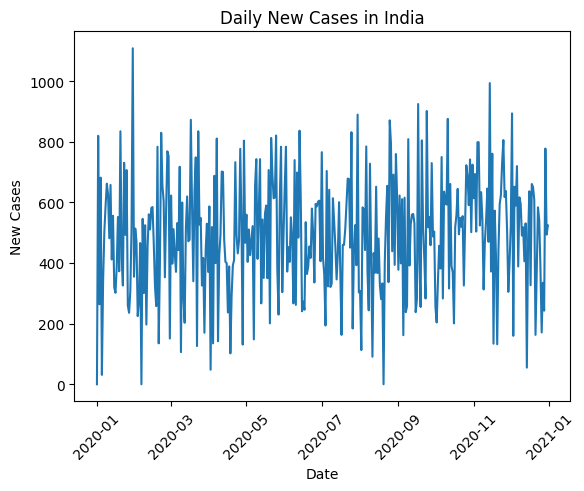

In [44]:
#4.Plot Daily New Cases for a Country

india=df[df["Country"]=="India"]

plt.plot(india["Date"],india["New_Cases"])
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.title("Daily New Cases in India")
plt.xticks(rotation=45)
plt.show()

In [30]:
#5.Top 5 Countries With Highest Total Cases
top5=country_summary.sort_values("Cases",ascending=False).head()
print(top5)

            Cases  Deaths  Recoveries
Country                              
USA      34361605  643549    20190283
Italy    34214997  620482    20237999
Brazil   33454182  656380    20352379
India    32503993  662895    20745602
UK       31514200  642560    20285532


In [31]:
#6.Case Fatality Rate (CFR)
country_summary["CFR(%)"]=country_summary["Deaths"]/country_summary["Cases"]*100
print(country_summary)

            Cases  Deaths  Recoveries    CFR(%)
Country                                        
Brazil   33454182  656380    20352379  1.962027
India    32503993  662895    20745602  2.039426
Italy    34214997  620482    20237999  1.813480
UK       31514200  642560    20285532  2.038954
USA      34361605  643549    20190283  1.872872


In [45]:
#7.Active Cases Calculation
df["Active_Cases"]=df["Cases"]-df["Deaths"]-df["Recoveries"]
print(df["Active_Cases"])

1098      445
1099      783
1100      981
1101     1652
1102     1876
        ...  
727     71957
728     72226
729     72134
730     72779
731     73069
Name: Active_Cases, Length: 1830, dtype: int64


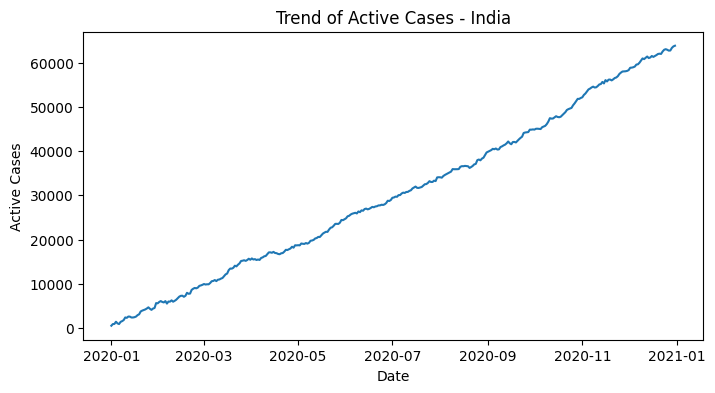

In [50]:
#8.Trend of Active Cases (Line Chart)
plt.figure(figsize=(8,4))
plt.plot(india["Date"],india["Active_Cases"])
plt.title("Trend of Active Cases - India")
plt.xlabel("Date")
plt.ylabel("Active Cases")
plt.xticks()
plt.show()
